<a href="https://colab.research.google.com/github/noe96cr/University/blob/master/Kaggle_and_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Usar data en Google Colab desde Kaggle**

---



1. Se importa el ambiente para trabajar en Kaggle

In [11]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

2. En cada database de Kaggle hay un cuadrito que indica que es para usar el API, se copia ese comando y es el que se usa acá abajo, sin modificar nada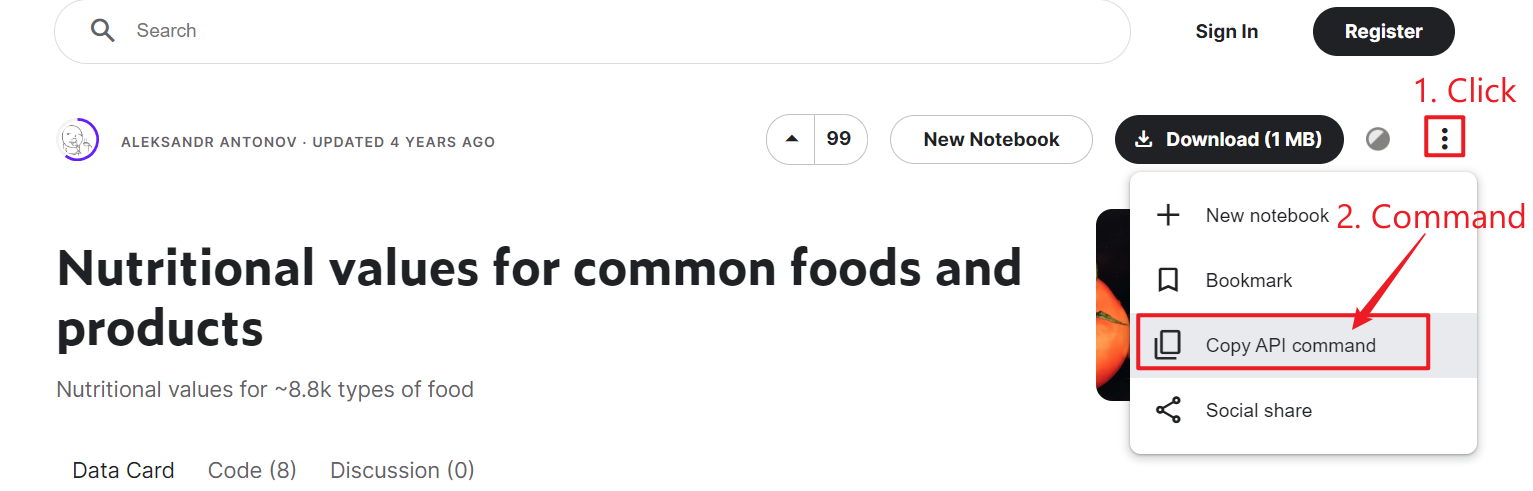

In [12]:
!kaggle datasets download -d trolukovich/nutritional-values-for-common-foods-and-products

  0% 0.00/1.27M [00:00<?, ?B/s]
100% 1.27M/1.27M [00:00<00:00, 127MB/s]


2.1 Ya tenemos nuestro archivo descargado en los archivos de colab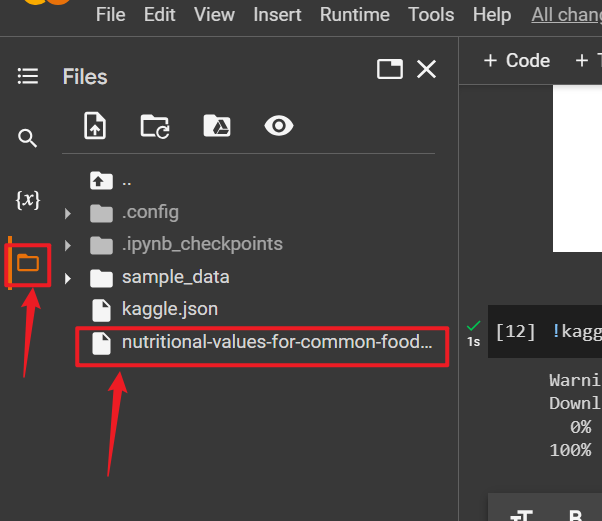

3. El archivo se descargo en formato .zip por ende debemos extraer y de paso eliminamos el .zip que no nos interesa.

In [15]:
!unzip \*.zip && rm *.zip

Archive:  nutritional-values-for-common-foods-and-products.zip
  inflating: nutrition.csv           


4. Ahora bien, procedemos a abrir el archivo .csv usando pandas

In [41]:
import pandas as pd
df = pd.read_csv('nutrition.csv')
df.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [34]:
df.columns

Index(['Unnamed: 0', 'name', 'serving_size', 'calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate',
       'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
       'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatt

5. Hacemos un nuevo df con las columnas necesarias

In [42]:
selected_columns = ['name', 'calories', 'total_fat', 'saturated_fat', 'vitamin_a', 'vitamin_b6', 'vitamin_b12']
newDf = df[selected_columns]
newDf

,name,calories,total_fat,saturated_fat,vitamin_a,vitamin_b6,vitamin_b12
0,Cornstarch,381,0.1g,NaN,0.00 IU,0.000 mg,0.00 mcg
1,"Nuts, pecans",691,72g,6.2g,56.00 IU,0.210 mg,0.00 mcg
2,"Eggplant, raw",25,0.2g,NaN,23.00 IU,0.084 mg,0.00 mcg
3,"Teff, uncooked",367,2.4g,0.4g,9.00 IU,0.482 mg,0
4,"Sherbet, orange",144,2g,1.2g,46.00 IU,0.023 mg,0.13 mcg
...,...,...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",125,3.5g,1.4g,11.00 IU,0.631 mg,1.64 mcg
8785,"Lamb, cooked, separable lean only, composite o...",206,8.9g,3.9g,0.00 IU,0.140 mg,2.95 mcg
8786,"Lamb, raw, separable lean and fat, composite o...",277,23g,12g,0.00 IU,0.110 mg,2.42 mcg
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",121,3g,1.1g,4.00 IU,0.644 mg,1.84 mcg


6. Ahora solo nos vamos a dejar los primeros 100 registros

In [43]:
first_100 = newDf.head(100)
first_100

,name,calories,total_fat,saturated_fat,vitamin_a,vitamin_b6,vitamin_b12
0,Cornstarch,381,0.1g,NaN,0.00 IU,0.000 mg,0.00 mcg
1,"Nuts, pecans",691,72g,6.2g,56.00 IU,0.210 mg,0.00 mcg
2,"Eggplant, raw",25,0.2g,NaN,23.00 IU,0.084 mg,0.00 mcg
3,"Teff, uncooked",367,2.4g,0.4g,9.00 IU,0.482 mg,0
4,"Sherbet, orange",144,2g,1.2g,46.00 IU,0.023 mg,0.13 mcg
...,...,...,...,...,...,...,...
95,"Pears, red anjou, raw",62,0.1g,NaN,24.00 IU,0.039 mg,0
96,"Horseradish, prepared",48,0.7g,0.1g,2.00 IU,0.073 mg,0.00 mcg
97,"Fish, raw, butterfish",146,8g,3.4g,100.00 IU,0.300 mg,1.90 mcg
98,"Lebanon bologna, beef",172,10g,2.8g,39.00 IU,0.391 mg,2.90 mcg


7. A los nombres se les deben cambiar los espacios y las ',' por guiones bajos para que prolog lo pueda leer.

In [44]:
import re
def replace_special_characters(name):
    # Verificar si tiene coma y espacio
    if ', ' in name:
        name = re.sub(r',\s', '_', name)

    # Verificar si tiene espacio y luego coma y espacio
    if ', ' in name:
        name = name.replace(', ', '_')

    # Verificar si solo tiene coma
    if ',' in name:
        name = name.replace(',', '_')

    # Verificar si solo tiene espacio
    if ' ' in name:
        name = name.replace(' ', '_')

    return name

# Aplicar la función a la columna 'name' del DataFrame
first_100['name'] = first_100['name'].apply(replace_special_characters)

first_100

<ipython-input-44-a276022fb58c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_100['name'] = first_100['name'].apply(replace_special_characters)


,name,calories,total_fat,saturated_fat,vitamin_a,vitamin_b6,vitamin_b12
0,Cornstarch,381,0.1g,NaN,0.00 IU,0.000 mg,0.00 mcg
1,Nuts_pecans,691,72g,6.2g,56.00 IU,0.210 mg,0.00 mcg
2,Eggplant_raw,25,0.2g,NaN,23.00 IU,0.084 mg,0.00 mcg
3,Teff_uncooked,367,2.4g,0.4g,9.00 IU,0.482 mg,0
4,Sherbet_orange,144,2g,1.2g,46.00 IU,0.023 mg,0.13 mcg
...,...,...,...,...,...,...,...
95,Pears_red_anjou_raw,62,0.1g,NaN,24.00 IU,0.039 mg,0
96,Horseradish_prepared,48,0.7g,0.1g,2.00 IU,0.073 mg,0.00 mcg
97,Fish_raw_butterfish,146,8g,3.4g,100.00 IU,0.300 mg,1.90 mcg
98,Lebanon_bologna_beef,172,10g,2.8g,39.00 IU,0.391 mg,2.90 mcg


7.2 Ahora verificamos que este corregido al 100%

In [45]:
# Verificar si la columna 'name' contiene un espacio
has_space = first_100['name'].str.contains(' ')

# Verificar si la columna 'name' contiene una coma
has_comma = first_100['name'].str.contains(',')

# Imprimir los resultados
print("Filas con espacio en 'name':")
print(first_100[has_space])

print("\nFilas con coma en 'name':")
print(first_100[has_comma])

Filas con espacio en 'name':
Empty DataFrame
Columns: [name, calories, total_fat, saturated_fat, vitamin_a, vitamin_b6, vitamin_b12]
Index: []

Filas con coma en 'name':
Empty DataFrame
Columns: [name, calories, total_fat, saturated_fat, vitamin_a, vitamin_b6, vitamin_b12]
Index: []


8. Ahora buscamos eliminar todas las letras de las ultimas 5 columnas, que solo quede el numero sin la unidad de medida

In [46]:
first_100['total_fat'] = first_100['total_fat'].str.replace(r'[^\d.]', '', regex=True)
first_100['saturated_fat'] = first_100['saturated_fat'].str.replace(r'[^\d.]', '', regex=True)
first_100['vitamin_a'] = first_100['vitamin_a'].str.replace(r'[^\d.]', '', regex=True)
first_100['vitamin_b6'] = first_100['vitamin_b6'].str.replace(r'[^\d.]', '', regex=True)
first_100['vitamin_b12'] = first_100['vitamin_b12'].str.replace(r'[^\d.]', '', regex=True)

first_100

<ipython-input-46-324e280906a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_100['total_fat'] = first_100['total_fat'].str.replace(r'[^\d.]', '', regex=True)
<ipython-input-46-324e280906a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_100['saturated_fat'] = first_100['saturated_fat'].str.replace(r'[^\d.]', '', regex=True)
<ipython-input-46-324e280906a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,name,calories,total_fat,saturated_fat,vitamin_a,vitamin_b6,vitamin_b12
0,Cornstarch,381,0.1,NaN,0.00,0.000,0.00
1,Nuts_pecans,691,72,6.2,56.00,0.210,0.00
2,Eggplant_raw,25,0.2,NaN,23.00,0.084,0.00
3,Teff_uncooked,367,2.4,0.4,9.00,0.482,0
4,Sherbet_orange,144,2,1.2,46.00,0.023,0.13
...,...,...,...,...,...,...,...
95,Pears_red_anjou_raw,62,0.1,NaN,24.00,0.039,0
96,Horseradish_prepared,48,0.7,0.1,2.00,0.073,0.00
97,Fish_raw_butterfish,146,8,3.4,100.00,0.300,1.90
98,Lebanon_bologna_beef,172,10,2.8,39.00,0.391,2.90


9. Para terminar exportamos el archivo a un csv que luego modificamos para tener el formato que queremos en un txt para usar en prolog, todo listo

In [49]:
# Exportar el DataFrame a un archivo CSV sin el encabezado
first_100.to_csv('alimentos.csv', index=False, header=False)

# Leer el archivo CSV recién creado
with open('alimentos.csv', 'r') as file:
    lines = file.readlines()

# Modificar las líneas para agregar el formato deseado y un salto de línea
formatted_lines = ['Alimentos (' + line.strip() + ').\n' for line in lines]

# Escribir las líneas modificadas en un nuevo archivo
with open('alimentos_formatted.txt', 'w') as file:
    file.writelines(formatted_lines)



10. Todo esta listo, podemos usar el .txt para copiar y pegar en prolog para realizar el trabajo.